<a href="https://colab.research.google.com/github/EricOliveira17/analise-de-dados-semi-estruturados-/blob/master/Titanic_models_by_Eric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By - Eric Oliveira  "Estudos📚🔬🔍"

In [1]:
# importando bibliotecas para analises
import pandas            as pd 
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Carregando o dataset através da biblioteca seaborn 
titanic = sns.load_dataset('titanic')

In [3]:
 
# Visualizando primeiras linhas do conjunto de dados 
titanic.head ()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
 
#Visualizando distribuição de pessoas por sexo entre os integrantes abordo 
titanic.sex.value_counts ()

male      577
female    314
Name: sex, dtype: int64

In [5]:
# Criando função para transformar os valores de sexo que estão como objetos 
# Para números inteiros onde o número 1 representa "mulheres" e o número 0 "homens"
def sexo_binario (valor):
   if valor == "female":
     return 1
   else:
     return 0
 
titanic["sexo_numerico"] = titanic["sex"].map(sexo_binario)

In [6]:
# Visualizando distribuição de pessoas por sexo entre os integrantes abordo
# Agora com sexo em formato númerico 
titanic.sexo_numerico.value_counts ()

0    577
1    314
Name: sexo_numerico, dtype: int64

In [7]:
 
# transformando coluna "idade" de valor flutuante para valor inteiro
titanic["age"] = titanic["age"].fillna(0).astype(int)

In [8]:
#transformando coluna "custo de embarque" de valor flutuante para valor inteiro
titanic["fare"] = titanic["fare"].astype(int)

In [9]:
 
# Visualizando informações de todas as colunas 
titanic.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       891 non-null    int64   
 1   pclass         891 non-null    int64   
 2   sex            891 non-null    object  
 3   age            891 non-null    int64   
 4   sibsp          891 non-null    int64   
 5   parch          891 non-null    int64   
 6   fare           891 non-null    int64   
 7   embarked       889 non-null    object  
 8   class          891 non-null    category
 9   who            891 non-null    object  
 10  adult_male     891 non-null    bool    
 11  deck           203 non-null    category
 12  embark_town    889 non-null    object  
 13  alive          891 non-null    object  
 14  alone          891 non-null    bool    
 15  sexo_numerico  891 non-null    int64   
dtypes: bool(2), category(2), int64(7), object(5)
memory usage: 87.6+ KB


In [10]:
# Visualizando valores descritivos 
titanic.describe ()

,survived,pclass,age,sibsp,parch,fare,sexo_numerico
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.783389,0.523008,0.381594,31.785634,0.352413
std,0.486592,0.836071,17.597344,1.102743,0.806057,49.703730,0.477990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.000000,0.000000
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000,1.000000


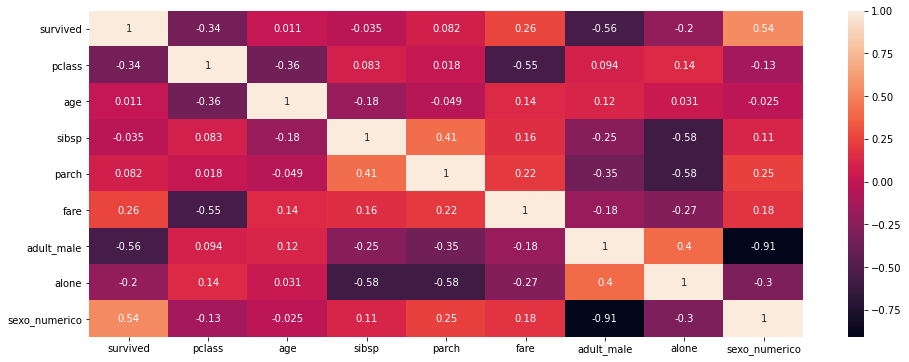

In [11]:

# Visualizando correlações entre variáveis 
correlacao = titanic.corr()
plt.figure(figsize=(16,6))
sns.heatmap(data=correlacao,annot=True)

In [12]:
# Atribuindo os atributos preditivos a variável X -("independente")
# Atribuindo a variável alvo preditora  Y -("dependente")
X = titanic[["age","fare","sexo_numerico","pclass","sibsp"]]
Y = titanic["survived"]

In [13]:
 
# importando bibliotecas para modelagem 
from sklearn.ensemble        import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score

In [14]:
# Instânciando modelos
modelo_RFC = RandomForestClassifier (bootstrap=True,
                                     n_estimators=1000,
                                     n_jobs=-1,
                                     random_state=0,
                                     max_features='sqrt')

In [15]:
# Divisão dados de treino e teste
np.random.seed(0)
X_treino,X_valid,Y_treino,Y_valid = train_test_split (X,Y,
                                                      test_size=0.5,
                                                      random_state=0)

In [16]:
 
# A forma como os dados são divididos pelo train_test_split
X_treino.shape,X_valid.shape,Y_treino.shape,Y_valid.shape

((445, 5), (446, 5), (445,), (446,))

In [17]:
# MODELO RANDOM FOREST CLASSIFIER 
# fit 
modelo_RFC.fit (X_treino,Y_treino)
# predict
Y_pred = modelo_RFC.predict(X_valid)

In [19]:
# Precisão do modelo 
print("modelo_RFC Acuracia:{}".format(accuracy_score(Y_valid,Y_pred)))

modelo_RFC Acuracia:0.773542600896861


A acurácia do modelo é de 77% ou seja o modelo prevê dentro de uma amostra de 100 tripulantes que 77 sobrevivem ou não🚢🔍